In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC , LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
url= 'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
df = pd.read_csv (url )
df.head(20)
df.shape
df.info()
df.isnull().sum()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [186]:


df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [160]:
df['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

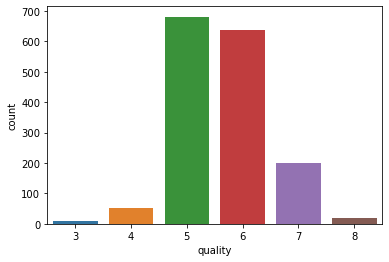

In [187]:
sb.countplot(x='quality',data=df)

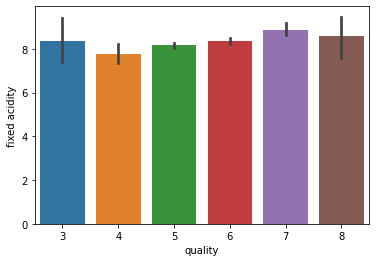

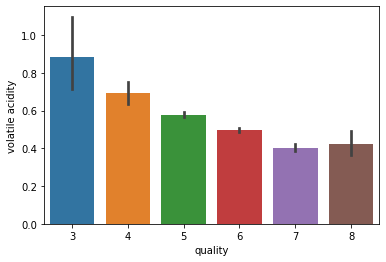

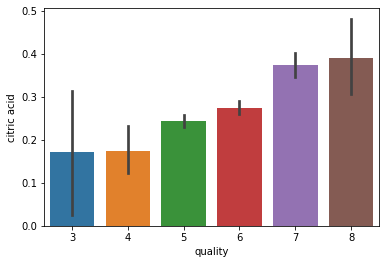

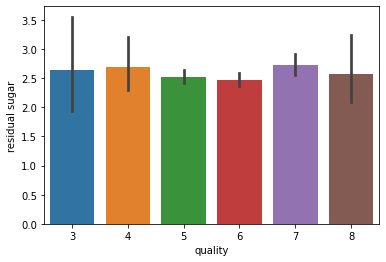

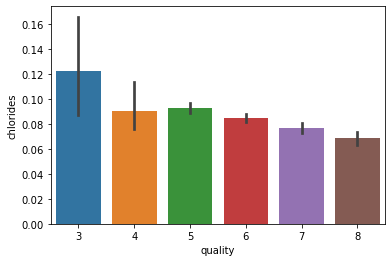

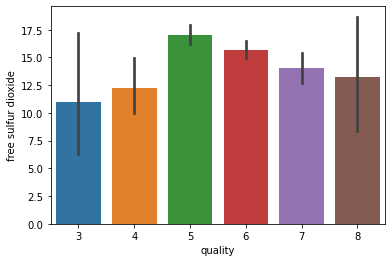

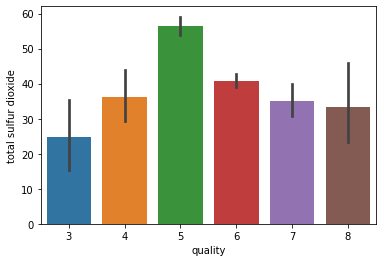

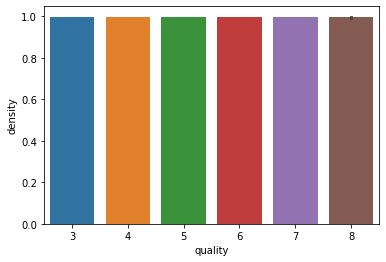

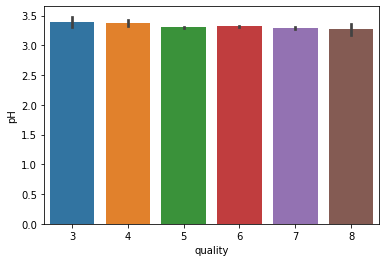

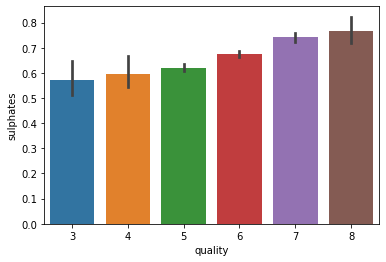

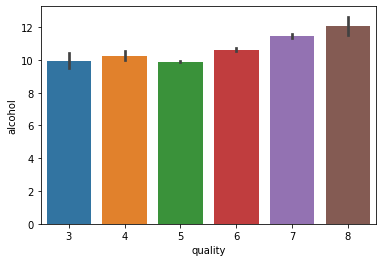

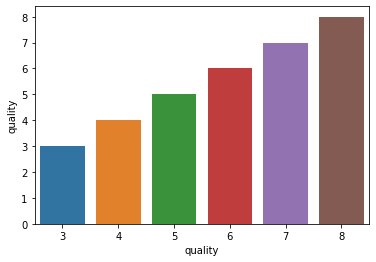

In [188]:
df1=df.select_dtypes([np.int,np.float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sb.barplot(x='quality',y=col,data=df1)

In [164]:
#plt.figure(figsize=(15,5))
#sb.boxplot(x="quality", y="alcohol", data=df)

    

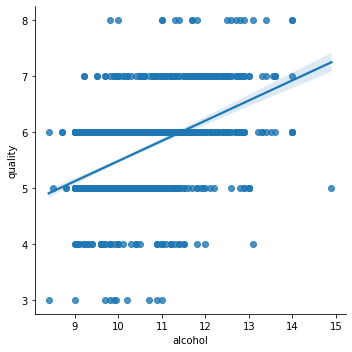

In [165]:
sb.lmplot(x="alcohol",y="quality", data=df)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

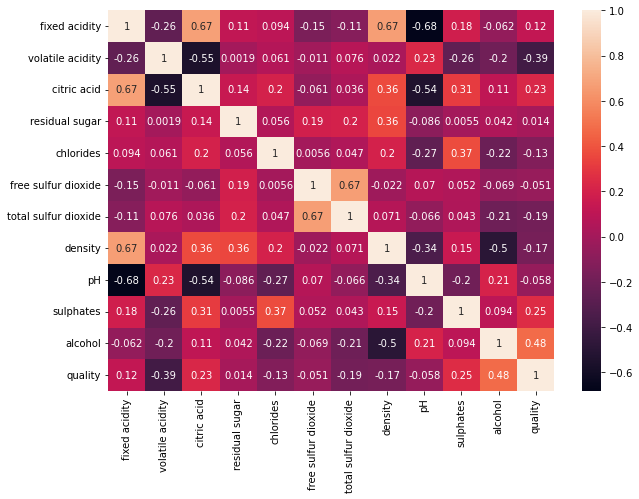

In [189]:
plt.figure(figsize=(10,7))
sb.heatmap(df.corr(),color="k",annot=True)
plt.show
df.corr()['quality'].sort_values()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

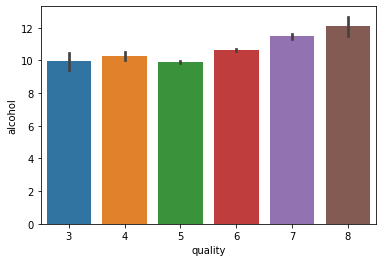

In [190]:
sb.barplot(df['quality'],df['alcohol'])

In [191]:
df['quality']=df.quality.apply(lambda x:1 if x>=7 else 0)
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [192]:
label_quality = LabelEncoder()
df['quality']=label_quality.fit_transform(df['quality'])

In [193]:
df.head(10)
df['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

In [194]:
y=df.quality
X=df.drop('quality',axis=1)

In [195]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
print(y_train.shape , y_test.shape, X_train.shape , X_test.shape)

(1119,) (480,) (1119, 11) (480, 11)


In [196]:

logreg = LogisticRegression()
logreg.fit(X_train , y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred , y_test)
print(" test accuracy is: {:.2f}%".format(logreg_acc*100))




 test accuracy is: 86.88%


In [197]:

print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.58      0.21      0.31        67

    accuracy                           0.87       480
   macro avg       0.73      0.59      0.62       480
weighted avg       0.84      0.87      0.84       480

